# Analysis: Best online market to advertise an E-Learning product

Online learning has become one of the popular ways of learning today. Our company offers online-courses, most of our courses are on the web and mobile development, but we also cover many other domains, like data science, game development, etc. The company wants to promote it's products and is willing to invest some money in advertisement. In this project, we are going to identify which is the best market to advertise our new offerings.

![image](online_learning.jpg)
[Image_Source](https://www.freepik.com/)


We have the following information that needs to be considered before we start our analysis.
- we mainly offer web or mobile development courses
- our courses are offered in English
- our monthly subscription rate is $59.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search for existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. The survey data is publicly available in the [GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data) repository.

# Initial Setup

We will start with our initial set up where we will import the libraries required for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading and understanding the data

In [2]:
# Read the inputfile
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'

# Convert the data into a dataframe
fcc_data = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning
pd.options.display.max_columns # to avoid truncated display

# To save locall a copy of the input file
# fcc_data.to_csv(r'G:\Folder\fcc_data.csv', index=False, na_rep='NA')

# Display first few rows of the input file
fcc_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# To understand the number of rows and columns
fcc_data.shape 

(18175, 136)

As we mentioned earlier, most of the courses we offer are on the web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, it important to know the interest of the new coders. We'd like to know:

- What are the job roles the new coders interested at?
- Where are the greatest number of new coders located?
- How much money are new coders willing to spend on learning?

# What are the preferred job roles?

In [4]:
# Create a distribution based on the interested Job Roles
role_distribute = fcc_data['JobRoleInterest'].value_counts(normalize=True)*100
role_distribute.head(10)

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

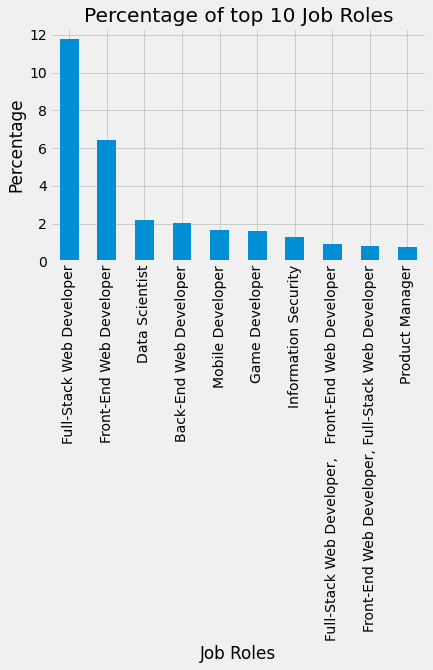

In [5]:
# Plot the role_distibution
plt.style.use('fivethirtyeight')
role_distribute.head(10).plot.bar()
plt.xlabel('Job Roles')
plt.ylabel('Percentage')
plt.title('Percentage of top 10 Job Roles')
plt.show()

We created a distribution based on the interested Job Role and plotted a bar graph for the first 10 preferred Job Roles. From the above distribution we can come to the following conclusions:

- Most preferred Job Role is as Web Developer (Full-Stack, Front-End, Back-End)
- Many are interested in other domains as well
- Some are interested in multiple Roles

Since the interested job role plays an important role in our analysis, we need to understand if there exists any row where this information is missing. 

In [6]:
# Analyse information in the column 'JobRoleInterest'
fcc_data['JobRoleInterest'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                    11183
Full-Stack Web Developer                                                                                                                                                                                                 823
  Front-End Web Developer                                                                                                                                                                                                450
  Data Scientist                                                                                                                                                                                                         152
Back-End Web Developer                                                                                              

From the above analysis it is evident that there exists many rows where 'JobRoleInterest' is missing. In order to clean our dataset we will consider only rows where this information is available.

In [7]:
# Create a new dataframe by removing the rows where column 'JobRoleInterest' was not filled
fcc_data_good = fcc_data[fcc_data['JobRoleInterest'].notnull()].copy()
fcc_data_good.shape

(6992, 136)

We had earlier observed that the some coders have filled multiple roles in the column 'JobRoleInterest'. Now we will try to find further details on this information.

In [8]:
# Dig deep into interested role/s
interest_roles = fcc_data_good['JobRoleInterest'].str.split(',')
role_count = interest_roles.apply(lambda x : len(x))
role_count_sorted = role_count.value_counts(normalize=True).sort_index()
round(role_count_sorted*100, 2)

1     31.65
2     10.88
3     15.89
4     15.22
5     12.04
6      6.72
7      3.86
8      1.76
9      0.99
10     0.47
11     0.19
12     0.30
13     0.03
Name: JobRoleInterest, dtype: float64

From the above analysis, we can conclude that:

- 31.65% are interested in a single role
- 68.35% are interested in multiple roles

Since our focus is on Web and Mobile development, let's find out how many are interested in these two roles.

True     86.298627
False    13.701373
Name: JobRoleInterest, dtype: float64


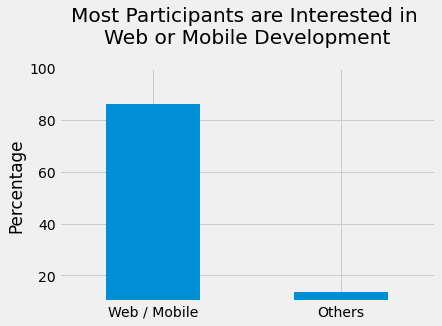

In [9]:
# Frequeny table
web_mobile = fcc_data_good['JobRoleInterest'].str.contains('Web | Mobile')
freq_table = web_mobile.value_counts(normalize=True)*100
print(freq_table)

# Plot freq_table
freq_table.plot.bar()
plt.xticks(range(2), ['Web / Mobile', 'Others'], rotation=0)
plt.ylim(10,100)
plt.ylabel('Percentage')
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.08) # y pads the title upward
plt.show()

The graph shows that majority of the people (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located?
- How much money are new coders willing to spend on learning?

# New Coders - Locations

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at the country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [10]:
# Create an absolute frequency distribution for location
country_live_abs = fcc_data_good['CountryLive'].value_counts()

# Create an relative frequency distribution for location
country_live_rel = fcc_data_good['CountryLive'].value_counts(normalize=True)*100

# Create a dataframe with absolute and relative distribution of the country
country_distribution = pd.DataFrame({'Absolute Distribution':country_live_abs, 'Relative Distribution' : country_live_rel})
country_distribution.head(10)

,Absolute Distribution,Relative Distribution
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the above analysis, we can clearly say the USA and India are the top two locations. But UK and Canda are not far behind.

# Spending Money for Learning
Our company sells subscriptions for $59 per month, for this reason, we are interested in finding out how much money each student spends per month.

We have decided to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Let's start by creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. Before we go ahead, we need to confirm that the column MonthsProgramming does not contain 0, as this would result in division error.

In [11]:
# Check if 'MonthsProgramming' contains 0
val_zero = fcc_data_good[fcc_data_good['MonthsProgramming']==0]
val_zero.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
234,25.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,33.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,25.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,29.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, we can see there are some rows where MonthsProgramming is having 0. Probably the students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [12]:
# To replace value 0 with 1 in the column 'MonthsProgramming' 
fcc_data_good['MonthsProgramming'] = fcc_data_good['MonthsProgramming'].replace(0,1)

# Confirmation check 
val_zero = fcc_data_good[fcc_data_good['MonthsProgramming']==0]
val_zero

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston


Now we can proceed and create the new column MoneySpentPerMonth by dividing the MoneyForLearning column to the MonthsProgramming column

In [13]:
# Create new column 'MoneySpentPerMonth'
fcc_data_good['MoneySpentPerMonth'] = fcc_data_good['MoneyForLearning'] / fcc_data_good['MonthsProgramming']
fcc_data_good.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


For our analysis to make sense we need to remove the entries where the columns 'MoneySpentPerMonth' and 'CountryLive' have null value.

In [14]:
# Retain only the rows that don't have a null value for the new column 'MoneySpentPerMonth'.
fcc_data_good = fcc_data_good[fcc_data_good['MoneySpentPerMonth'].notnull()]

# Retain only the rows that don't have a null value for the 'CountyLive' column
fcc_data_good = fcc_data_good[fcc_data_good['CountryLive'].notnull()]

Let's go ahead and find out the mean amount spent per month by the selected four countries.

In [15]:
# Mean sum of money spent by students each month
fcc_mean = fcc_data_good.groupby(['CountryLive']).mean()
print('Mean of money spent per month' + '\n' + '-'*29)
print(fcc_mean['MoneySpentPerMonth'][['United States of America', 'India', 
                                      'United Kingdom', 'Canada']])

Mean of money spent per month
-----------------------------
CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

# Identify the outliers

In [16]:
# Isolate countries of interest
four_countries = fcc_data_good[fcc_data_good['CountryLive'].str.contains(
                    'United States of America|India|United Kingdom|Canada')]
four_countries.shape

(3915, 137)

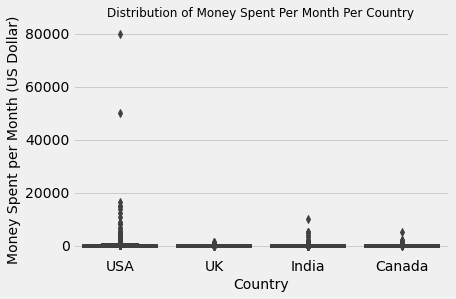

In [17]:
# Generate box plot to identify the outliers
sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data=four_countries)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Money Spent per Month (US Dollar)', fontsize=14)
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.title('Distribution of Money Spent Per Month Per Country', fontsize=12)
plt.show()

From the above plot, we can see that the USA has a couple of outliers at USD 50000 and USD 80000. Same way for India, USD 10000 can be considered as an outlier. But this is not a big outlier like the ones in the USA. Now we can find out the mean after removing these big outliers.

In [18]:
# Remove big outliers from the data
fcc_data_good = fcc_data_good[fcc_data_good['MoneySpentPerMonth']<20000]

# Re-calculate mean after removing the outlier
fcc_mean = fcc_data_good.groupby('CountryLive').mean()
print('Mean of money Spent per month\n'+ '-'*29)
print(fcc_mean['MoneySpentPerMonth'][['United States of America', 'India', 
                                      'United Kingdom', 'Canada']])

Mean of money Spent per month
-----------------------------
CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64


# Identify the outliers continued...

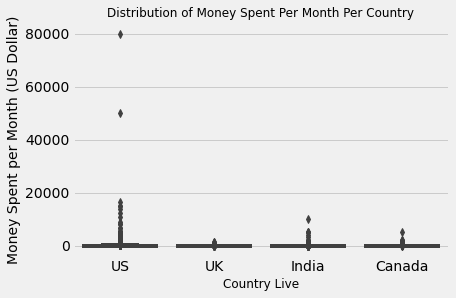

In [19]:
# Generate boxplot to identfy outliers
sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data=four_countries)
plt.xlabel('Country Live', fontsize=12)
plt.ylabel('Money Spent per Month (US Dollar)', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.title('Distribution of Money Spent Per Month Per Country', fontsize=12)
plt.show()

From the above box plot, we can observe some extreme outliers for the USA, India, and Canada. This time we will analyse these outliers for each country separately and see if they are removed in order to clean the dataset. 

# Evaluation and Removing outliers for the USA

For the USA, we can consider $6000 as an outlier and now try to analyze whether these big expenses with learning are justified or not.

In [20]:
# Evaluate the outliers for USA
usa_outlier = four_countries[(four_countries['CountryLive'] == 'United States of America') &
                             (four_countries['MoneySpentPerMonth']>6000)]
usa_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000


When analyzing the above table we can understand that out of 13 participants, 7 have attended boot camps (column 'AttendedBootcamp'). Since boot camps are quite expensive, this is justifiable. From the remaining 6, it is not yet clear why they had to spend more money. So to reduce the outliers, we will remove participants based on the below conditions:

- those who did not attend Bootcamps (column 'AttendedBootcamp')
- those who spent 3 or fewer months for programming (columns 'MonthsProgramming')

In [21]:
# Evaluate the outliers for USA continued...

# Remove those particpants who did not attend bootcamp
no_bootcamp = four_countries[(four_countries['CountryLive'] == 'United States of America')
                            & (four_countries['MoneySpentPerMonth']>6000)
                            & (four_countries['AttendedBootcamp'] == 0)]
four_countries = four_countries.drop(no_bootcamp.index)

# Remove those participants who spent 3 or less months for programming 
three_or_less  = four_countries[(four_countries['CountryLive'] == 'United States of America')
                               & (four_countries['MoneySpentPerMonth'] > 6000)
                               & (four_countries['MonthsProgramming'] <= 3)]
four_countries = four_countries.drop(three_or_less.index)

print('No Bootcamp (USA): ', no_bootcamp.shape)
print('Months less or equal 3 (USA): ', three_or_less.shape)

No Bootcamp (USA):  (6, 137)
Months less or equal 3 (USA):  (7, 137)


# Evaluation and Removing outliers for India

For India, the amount spent above $2500 can be considered as an outlier. We will now analyze these cases and see whether these big expenses with learning are justified or not.

In [22]:
# Evaluate the outliers for India
india_outlier = four_countries[(four_countries['CountryLive'] == 'India')
                              & (four_countries['MoneySpentPerMonth'] > 2500)]
india_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


We can see that none of those participants attended boot camps. There is a possibility they might have misunderstood the question regarding the money spent on programming as to money spent in Universities as all these participants hold a Bachelor's degree. With this assumption, it is better to remove these outliers from our analysis.

In [23]:
# Remove the outlies for India
four_countries = four_countries.drop(india_outlier.index)
print('No Bootcamp (India):', india_outlier.shape)

No Bootcamp (India): (6, 137)


# Evaluation and Removing outliers for Canada

For Canada, the amount spent above $2500 can be considered as an outlier. So we will analyze these cases.

In [24]:
# Evaluate the outliers for Canada
canada_outlier = four_countries[(four_countries['CountryLive']=='Canada')
                               & (four_countries['MoneySpentPerMonth']>2500)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Like for the USA, here also we have a participant who spent more because the participant has taken part in boot camp. Also, the number of months spend on programming is 2. So we can remove this case as well.

In [25]:
# Remove outliers for Canada
four_countries = four_countries.drop(canada_outlier.index)

Now that we removed all the possible outliers that was affecting the analyses, let us re-calulate the mean on this clean dataset.

In [26]:
# Re-calculate mean after removing the outlier
fcc_mean = four_countries.groupby('CountryLive').mean()

print('Mean of money spent per month' + '\n' + '-'*29)
print(fcc_mean['MoneySpentPerMonth'])


Mean of money spent per month
-----------------------------
CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentPerMonth, dtype: float64


Let's generate a new boxplot after removing all the possible outliers.

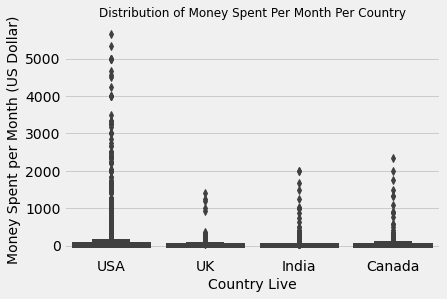

In [27]:
# Generate box plot on the cleaned data
sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data=four_countries)
plt.xlabel('Country Live', fontsize=14)
plt.ylabel('Money Spent per Month (US Dollar)', fontsize=14)
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.title('Distribution of Money Spent Per Month Per Country', fontsize=12)
plt.show()

# Choosing the best market 1

From the above analysis, we can strongly say that the USA is our first choice of the market to advertise. With a lot of coders and average money spent per month well above our rate, it makes the USA as the best option.

We can also consider another possible market from the other three. The UK can be ruled out since the average money spent per month is below our offering.

To choose between India and Canada, we need to dig deeper into the data. To do so, we can consider the age of the coders as a parameter. Age is considered as a parameter because youngsters with the possibility of finding jobs faster would be more willing to spend on the online courses. And hence targetting a country with more youngsters could be a better idea. We can try to analyze which market among these two countries have more youngsters.

In [28]:
# Isolate countries of interest
two_countries = four_countries[(four_countries['CountryLive'] == 'India')
                               | (four_countries['CountryLive'] == 'Canada')]
two_countries.shape

(696, 137)

Before proceeding with our classification, we need to ensure that the column Age is clean. We will try to find out if all the coders have provided their age.

In [29]:
# Check if there are null values in column 'Age'
age_null = two_countries[two_countries['Age'].isnull()]
age_null

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
359,NaN,1.0,1.0,0.0,HackerYou,0.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.777778
1674,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.000000
1688,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.000000
12265,NaN,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.444444
13681,NaN,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000
15662,NaN,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


From the above observation, we see six coders have not filled thier age. So we will all the rows where participants have not mentioned their age.

In [30]:
# Remove rows where age is a null value
two_countries = two_countries[two_countries['Age'].notnull()]

To make our analysis easier, we need to classify the age as below:

- 35yrs and below as 'Youngster'
- above 35yrs as 'Older'

To achieve this, we would need to create a function. And using this function, we would then create a new column 'AgeCategory'.

In [31]:
# Function to classify age
def age_classifier(age):
    if age <= 35:
        return 'Youngster'
    else:
        return 'Older'
    
two_countries['AgeCategory'] = two_countries['Age'].apply(age_classifier)
two_countries.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth,AgeCategory
52,21.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,Youngster
55,17.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Youngster
58,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,0.000000,Youngster
64,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,Youngster
89,17.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.052632,Youngster


Now the dataset is ready and we can plot the graph in order to make a decision.

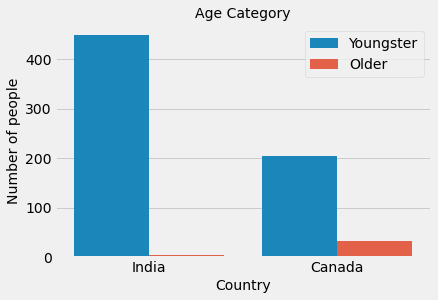

In [32]:
# Generate graph to understand age catagory
sns.countplot(x='CountryLive', hue='AgeCategory', data=two_countries)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of people', fontsize=14)
plt.title('Age Category', fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Choosing the best market 2

From the above graph, it is evident that India has more than double the number of youngsters when compared with Canada. With this, we can say India has the advantage and can be considered as our second market to advertise.

Before we jump to any conclusion, we can share this analysis with our marketing team who in turn can use their domain knowledge and decide on this. They may want to do some extra surveys to decide between India and Canada. Or they even may prefer to market in both countries.



# Conclusion

After our detailed analyses of our aim to identify the best two markets to advertise our offerings, we can conclude that the USA is the best market.

For the second market, we had to choose between India and Canada. To do this we used age as a parameter and understood that India could be a potential market. We decided to send our analysis to the marketing team and use their experience to make the final call.

Hope you enjoyed this project.

Thank You!